# **Processors Team**
### Computer Vision Competition 2020
### Faculty of Engineering - ASU

<br/>

---

<br/>

# **Low Light Image Enhancement Model**

<br/>

---


<br/>

### **First**, we connect to the drive.

<br/>

---

In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Importing** required libraries.


---


In [0]:
import numpy as np
import cv2
import imageio
import glob
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from scipy import ndimage

### **Loading** our dataset images.


---


In [0]:
path = r'/content/gdrive/My Drive/LOLdataset/our485/high'
all_files = glob.glob(path + "/*.png")
high = list()
all_files.sort()
for fileName in all_files:    
        img = imageio.imread(fileName)           
        high.append(img)       
high = np.array(high)

path = r'/content/gdrive/My Drive/LOLdataset/our485/low'
all_files = glob.glob(path + "/*.png")
all_files.sort()
low = list()
for fileName in all_files:
        img = imageio.imread(fileName)        
        low.append(img)        
low = np.array(low)

### **viewing** an example


---


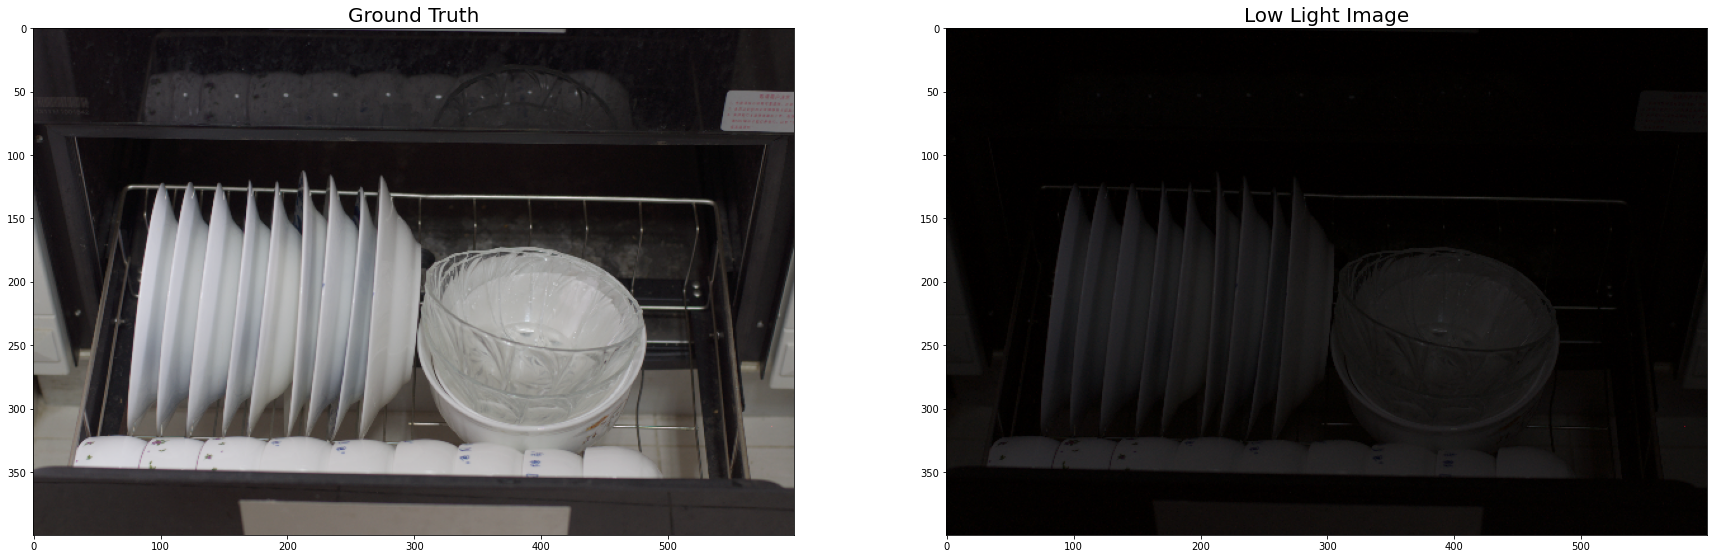

In [6]:
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
plt.title("Ground Truth",fontsize=20)
plt.imshow(high[479])

plt.subplot(1,2,2)
plt.title("Low Light Image",fontsize=20)
plt.imshow(low[479])

### Deep Neural Network Model
We employ a plain CNN of seven convolutional
layers with symmetrical concatenation. Each layer
consists of 32 convolutional kernels of size 3x3 and stride
1 followed by the ReLU activation function. The last convolutional
layer is followed by the sigmoid activation function which produce parameter map of pixel range [0:1]


---



In [7]:
inputs = keras.Input(shape=(None, None, 3), name='img')
out1 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(inputs)
out2 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(out1)
out3 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(out2)
out4 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(out3)
in5 = layers.add([out3, out4])
out5 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(in5)
in6 = layers.add([out2, out5])
out6 = layers.Conv2D(32, (3,3), activation='relu', padding="same", strides=(1, 1))(in6)
in7 = layers.add([out1, out6])
outputs = layers.Conv2D(1, (3,3), activation='sigmoid', padding="same", strides=(1, 1))(in7)
model = keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss='mean_squared_error')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 9248        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, None, None, 3 9248        conv2d_1[0][0]                   
______________________________________________________________________________________________

### shape of layers.

---



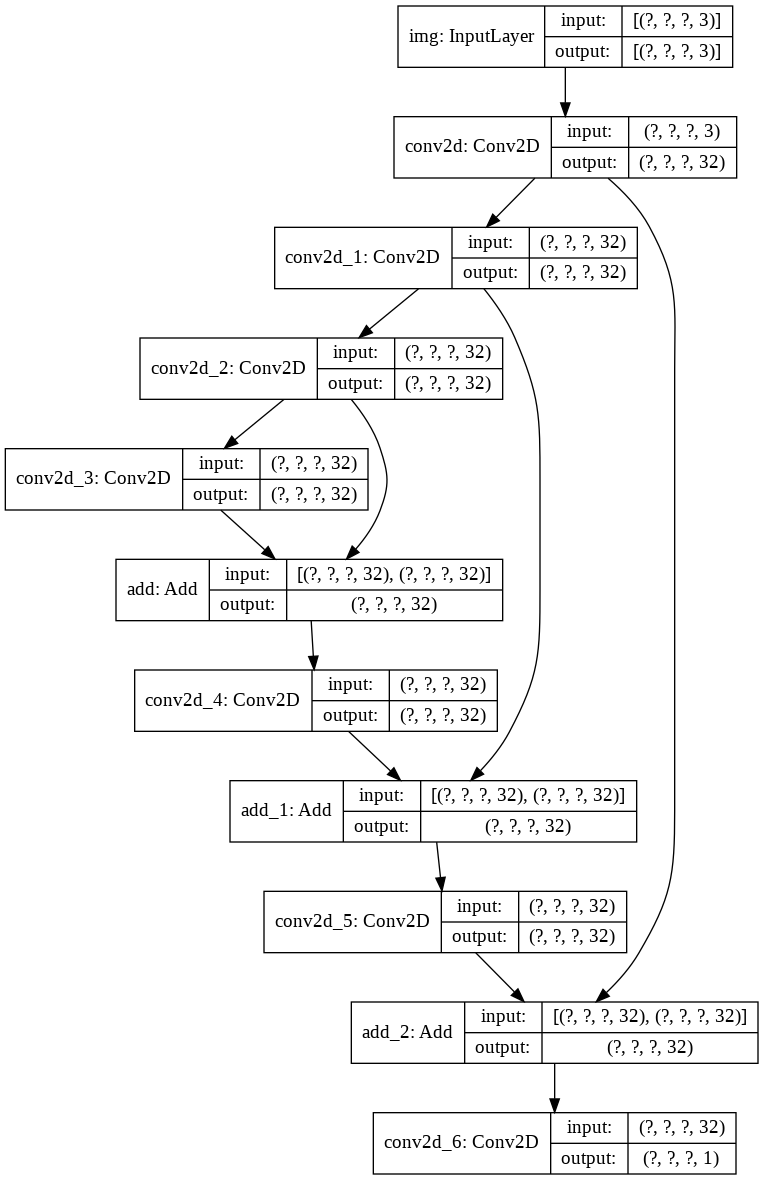

In [8]:
keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True)

### Training the model

---



In [9]:
def GenerateInputs(X,y):
    for i in range(len(X)):
        X_input = X[i].reshape(1,400,600,3)
        y_temp = y[i] / 255
        y_input = y_temp.reshape(1,400,600,3)
        yield (X_input,y_input)
        
        
model.fit(GenerateInputs(low,high), epochs=20, verbose=1, steps_per_epoch=24)

Epoch 1/20
24/24 [==============================] - 1s 21ms/step - loss: 0.1123
Epoch 2/20
24/24 [==============================] - 1s 21ms/step - loss: 0.0591
Epoch 3/20
24/24 [==============================] - 0s 21ms/step - loss: 0.0442
Epoch 4/20
24/24 [==============================] - 1s 21ms/step - loss: 0.0570
Epoch 5/20
24/24 [==============================] - 1s 21ms/step - loss: 0.0540
Epoch 6/20
24/24 [==============================] - 0s 21ms/step - loss: 0.0467
Epoch 7/20
24/24 [==============================] - 1s 22ms/step - loss: 0.1179
Epoch 8/20
24/24 [==============================] - 1s 22ms/step - loss: 0.0477
Epoch 9/20
24/24 [==============================] - 0s 21ms/step - loss: 0.0414
Epoch 10/20
24/24 [==============================] - 1s 21ms/step - loss: 0.0227
Epoch 11/20
24/24 [==============================] - 1s 21ms/step - loss: 0.0387
Epoch 12/20
24/24 [==============================] - 0s 21ms/step - loss: 0.0550
Epoch 13/20
24/24 [==================

### Saving the trained model

---



In [0]:
model.save(r'/content/gdrive/My Drive/ImageProcessing/ourModel.h5')

### **Loading** some low light images to test.


---

In [0]:
path = r'/content/gdrive/My Drive/LOLdataset/eval15/low'
all_files = glob.glob(path + "/*")
x = list()
all_files.sort()
for fileName in all_files:
        img = imageio.imread(fileName)       
        x.append(img)      
X = np.array(x)

### we converted the steps of iterations into recursive function. <br/>
**inputs:** <br/>
img: the low light image (**I**, **E**old) <br/>
index: no of iterations <br/>
flag: default = 1 


> *for more info. see README.md*


---


In [0]:
def Enhance(img, index, flag):
    if index == 0:
      return img

    elif flag == 1:
        h, w, c = img.shape
        test = model.predict(img.reshape(1, h, w, 3))
        temp = img / 255
        image = temp + ((test[0,:,:,:] * temp)*(1-temp))
        index = index - 1
        flag = 0
        return Enhance(image, index, flag)

    else:
        h, w, c = img.shape
        temp = model.predict(img.reshape(1, h, w, 3))
        image = img + ((temp[0,:,:,:] * img)*(1-img))
        index = index - 1
        return Enhance(image, index, flag)

###**Examples**

---



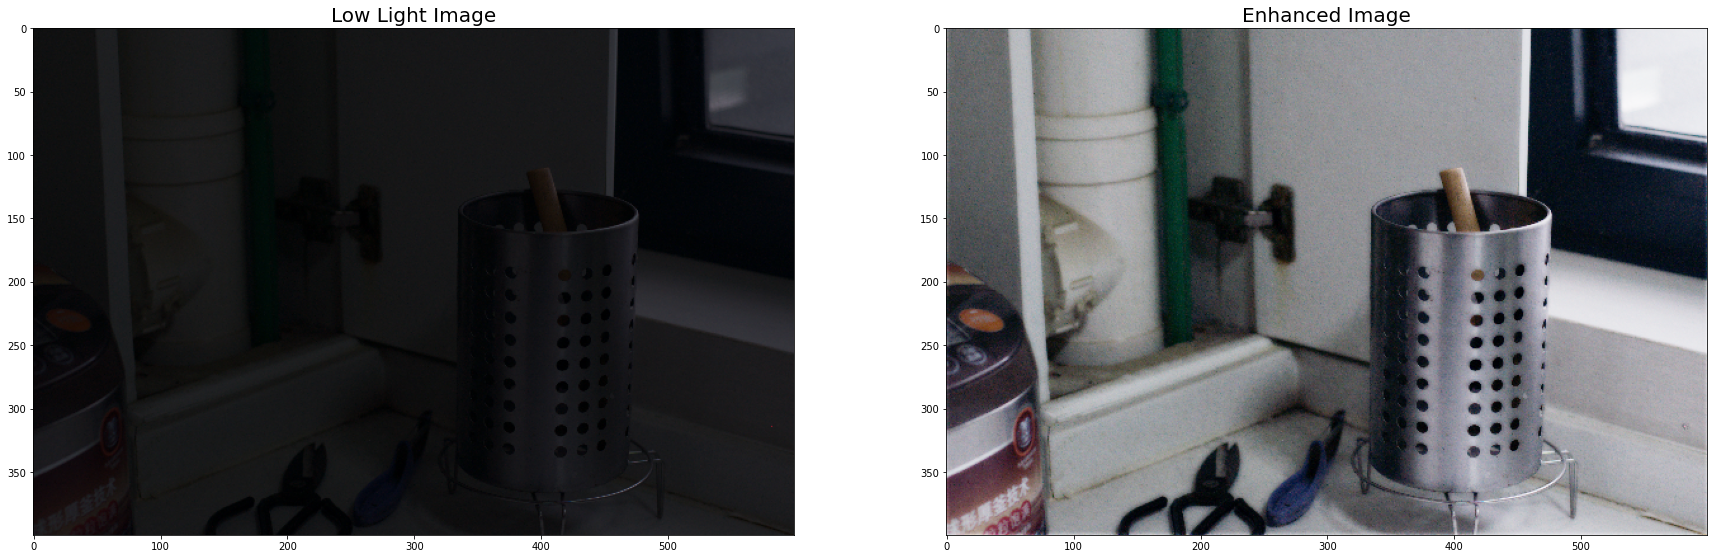

In [15]:
Image = X[1]

plt.figure(figsize=(30,30))

plt.subplot(1,2,1)
plt.title("Low Light Image",fontsize=20)
plt.imshow(Image)

plt.subplot(1,2,2)
plt.title("Enhanced Image",fontsize=20)
plt.imshow(Enhance(Image, 8, 1))

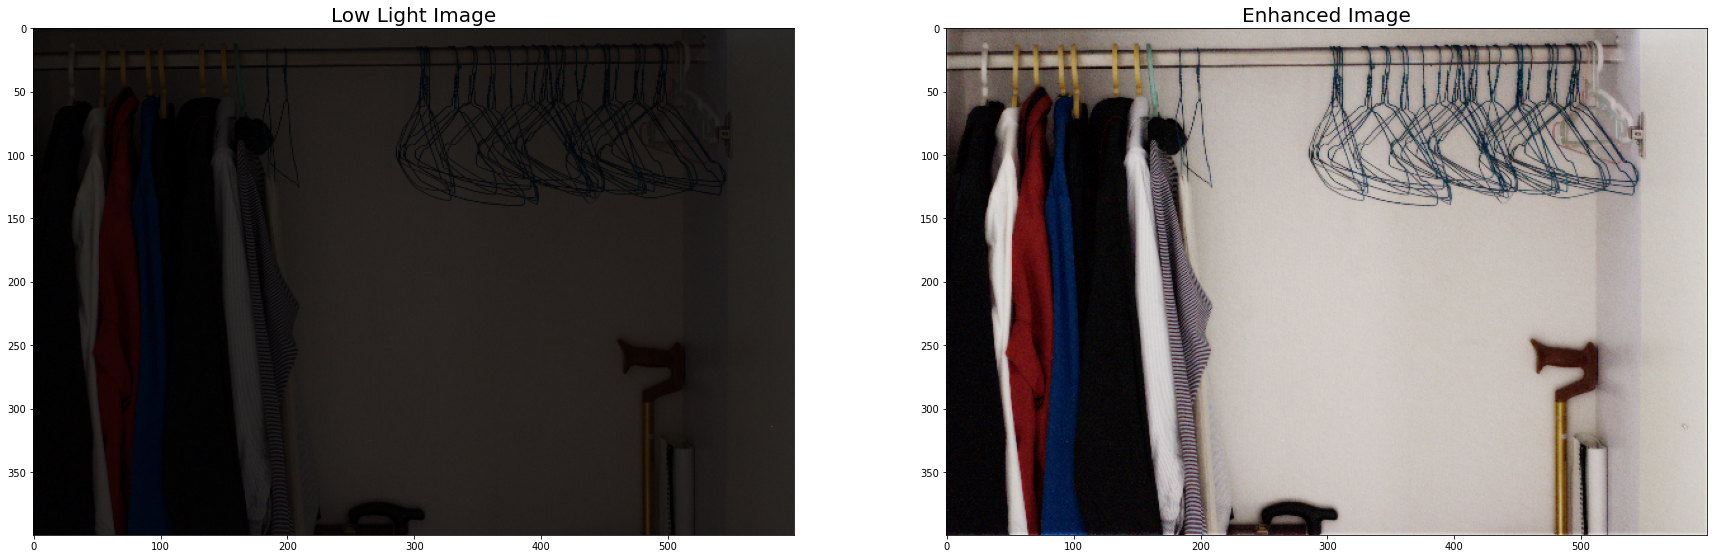

In [17]:
Image = X[2]

plt.figure(figsize=(30,30))

plt.subplot(1,2,1)
plt.title("Low Light Image",fontsize=20)
plt.imshow(Image)

plt.subplot(1,2,2)
plt.title("Enhanced Image",fontsize=20)
plt.imshow(Enhance(Image, 8, 1))

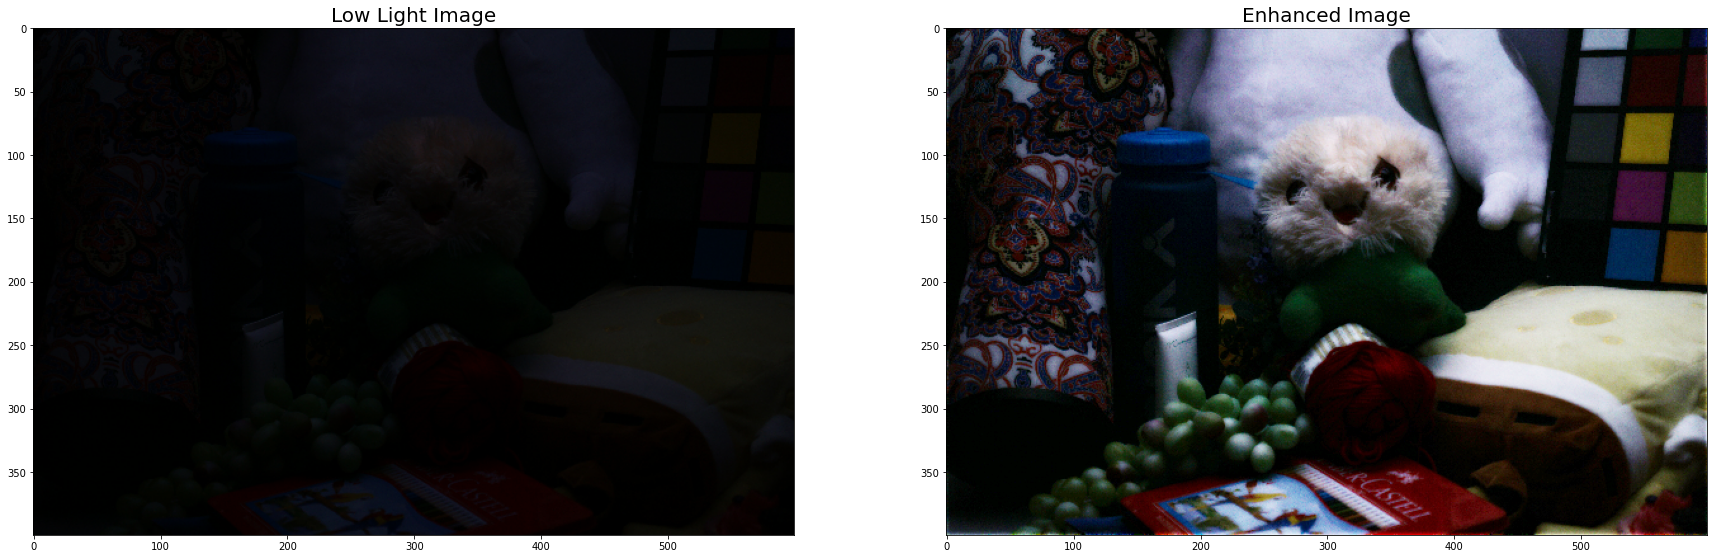

In [23]:
Image = X[6]

plt.figure(figsize=(30,30))

plt.subplot(1,2,1)
plt.title("Low Light Image",fontsize=20)
plt.imshow(Image)

plt.subplot(1,2,2)
plt.title("Enhanced Image",fontsize=20)
plt.imshow(Enhance(Image, 12, 1))

### **Extreme level** of low light images

---



In [0]:
path = r'/content/gdrive/My Drive/ImageProcessing/DataSet/test'
all_files = glob.glob(path + "/*")
x = list()
all_files.sort()
for fileName in all_files:      
        img = imageio.imread(fileName)           
        x.append(img)  
Z = np.array(x)

###**Examples**

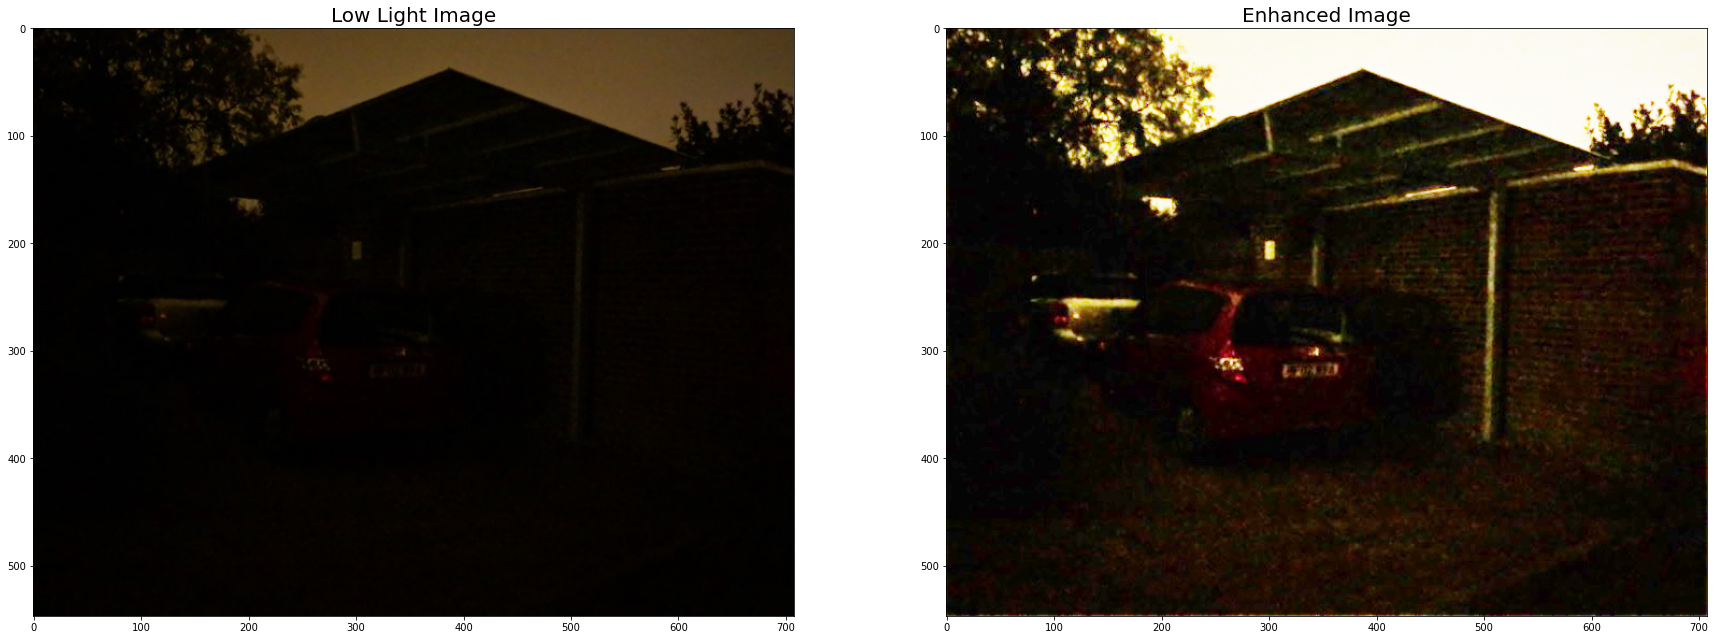

In [27]:
Image = Z[0]
plt.figure(figsize=(30,30))

plt.subplot(1,2,1)
plt.title("Low Light Image",fontsize=20)
plt.imshow(Image)

plt.subplot(1,2,2)
plt.title("Enhanced Image",fontsize=20)
plt.imshow(Enhance(Image, 12, 1))

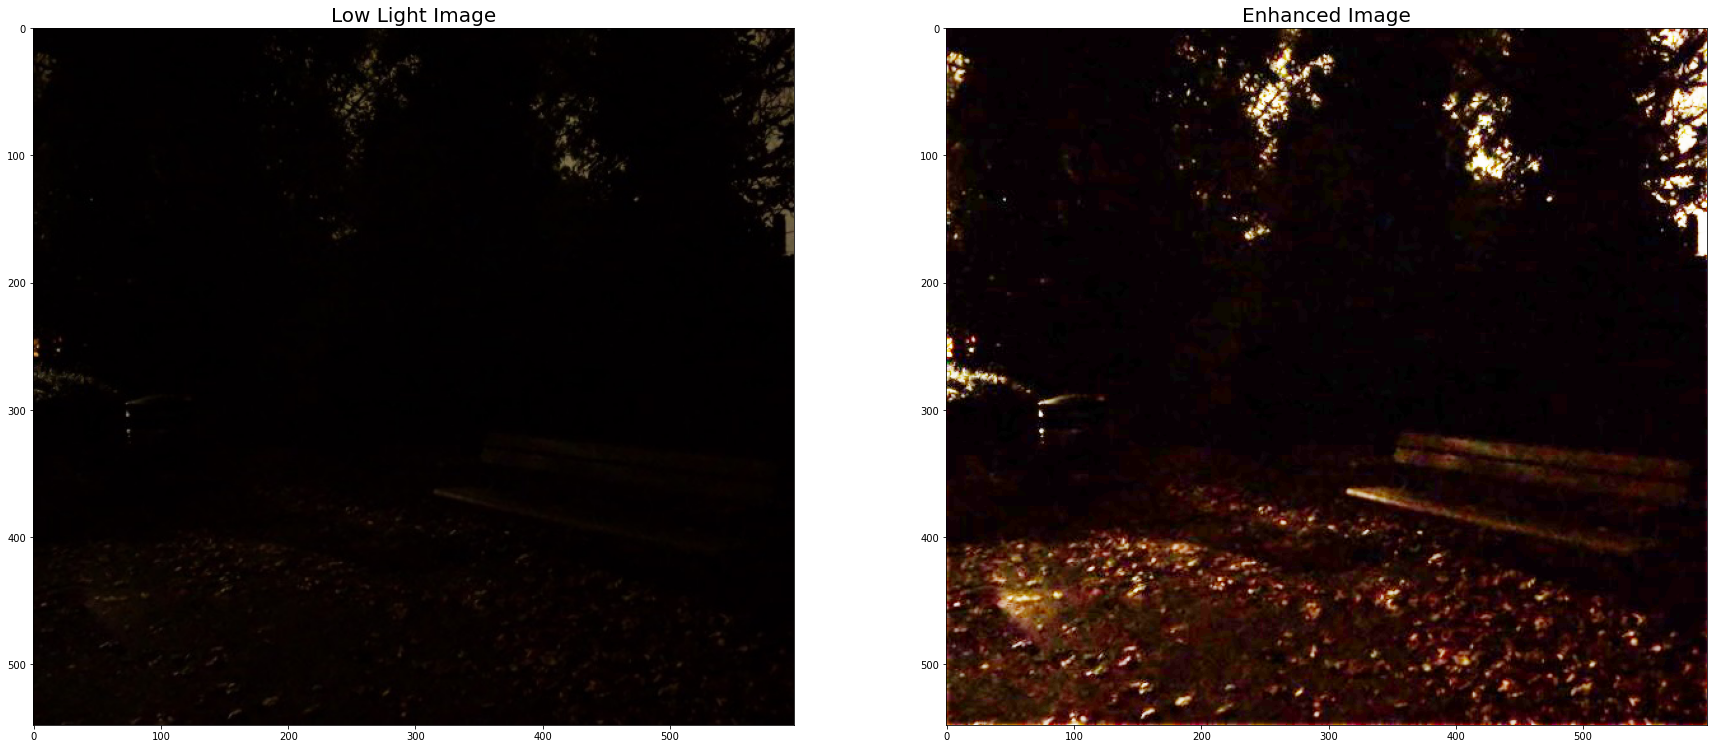

In [28]:
Image = Z[3]
plt.figure(figsize=(30,30))

plt.subplot(1,2,1)
plt.title("Low Light Image",fontsize=20)
plt.imshow(Image)

plt.subplot(1,2,2)
plt.title("Enhanced Image",fontsize=20)
plt.imshow(Enhance(Image, 12, 1))